In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

Data loading and collection

In [7]:
df=pd.read_csv("C:\\Users\\user\\OneDrive\\Bureau\\stage CodeAlpha\\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Exploratory Data Analysis

In [8]:
#Getting to know our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#Summary stats
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
#Inspecting if we got any null values to deal with in the data cleaning step
null_values=df.isnull().sum()
print(f"the number of null values in this dataframe is:\n{null_values}")

the number of null values in this dataframe is:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [11]:
#Inspecting if we got any duplicated values to deal with in the data cleaning step
duplicated_values=df.duplicated().sum()
print(f"the number of duplicated values in this dataframe is:\n{duplicated_values}")

the number of duplicated values in this dataframe is:
2


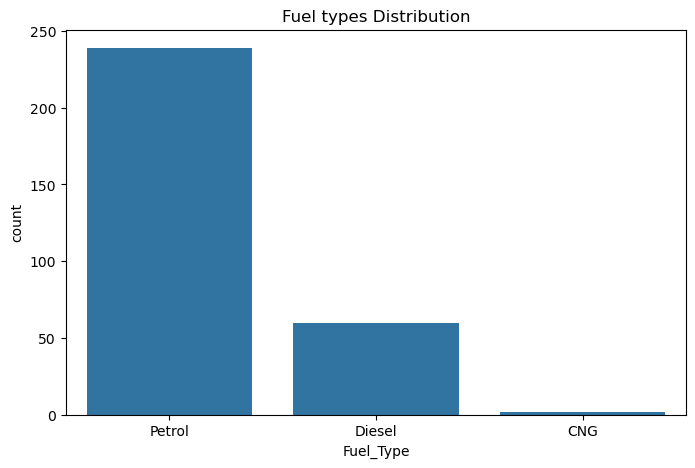

In [12]:
#Visualize the first categorical column (Fuel_Type) and see if there is one or more categories that should not exist
plt.figure(figsize=(8, 5))
sns.countplot(x='Fuel_Type', data=df)
plt.title("Fuel types Distribution")
plt.show()

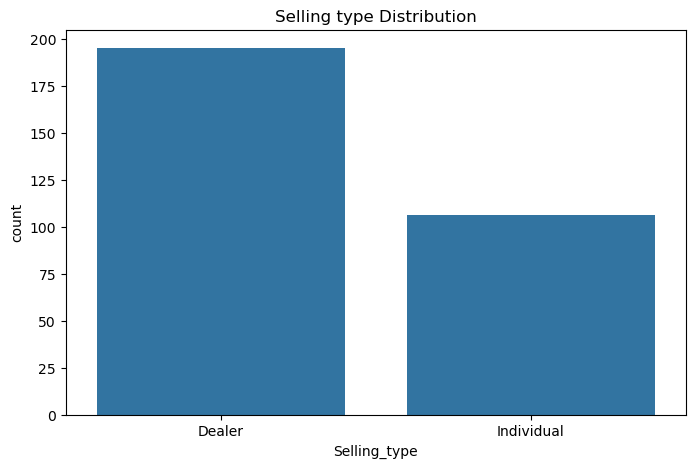

In [13]:
#Visualize the second categorical column (Selling_type) and see if there is one or more categories that should not exist
plt.figure(figsize=(8, 5))
sns.countplot(x='Selling_type', data=df)
plt.title("Selling type Distribution")
plt.show()

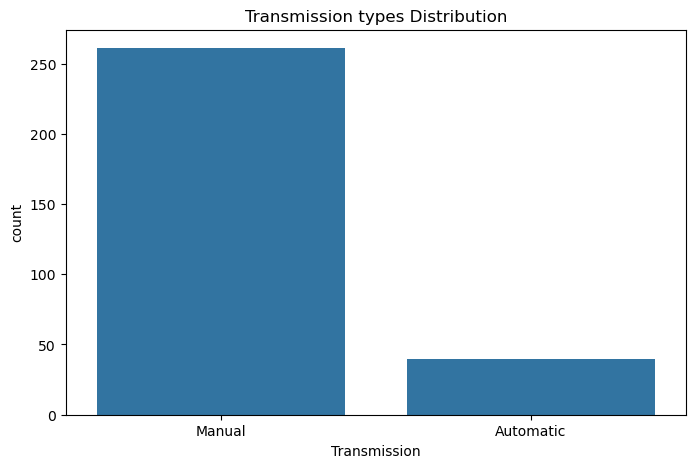

In [14]:
#Visualize the third categorical column (Transmission) and see if there is one or more categories that should not exist
plt.figure(figsize=(8, 5))
sns.countplot(x='Transmission', data=df)
plt.title("Transmission types Distribution")
plt.show()

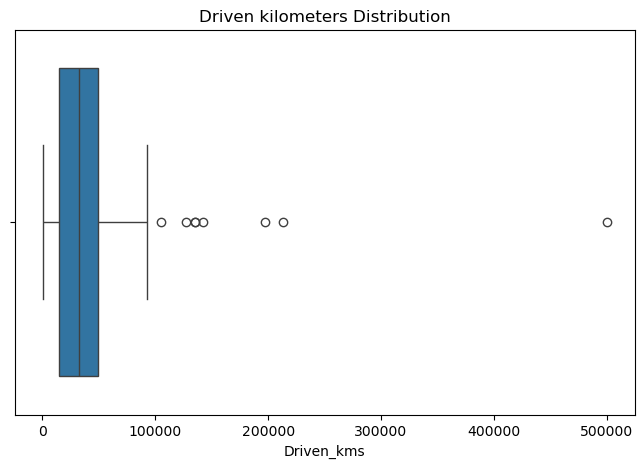

In [15]:
#Inspecting if there is some outlier or illogical values to deal with during data cleaning step for the Driven_kms column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Driven_kms'])
plt.title("Driven kilometers Distribution")
plt.show()

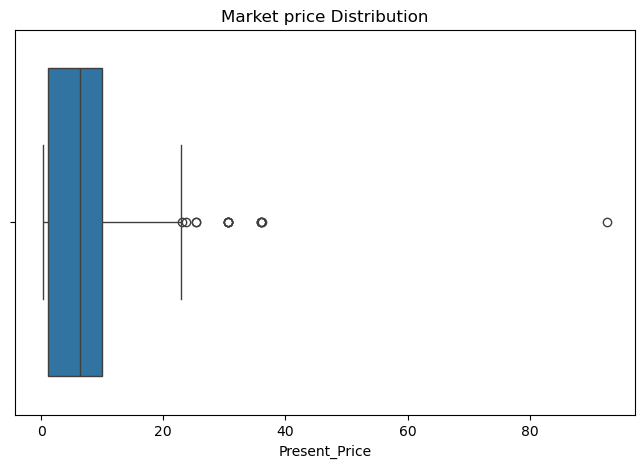

In [16]:
#Inspecting if there is some outlier or illogical values to deal with during data cleaning step for the Present_Price column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Present_Price'])
plt.title("Market price Distribution")
plt.show()

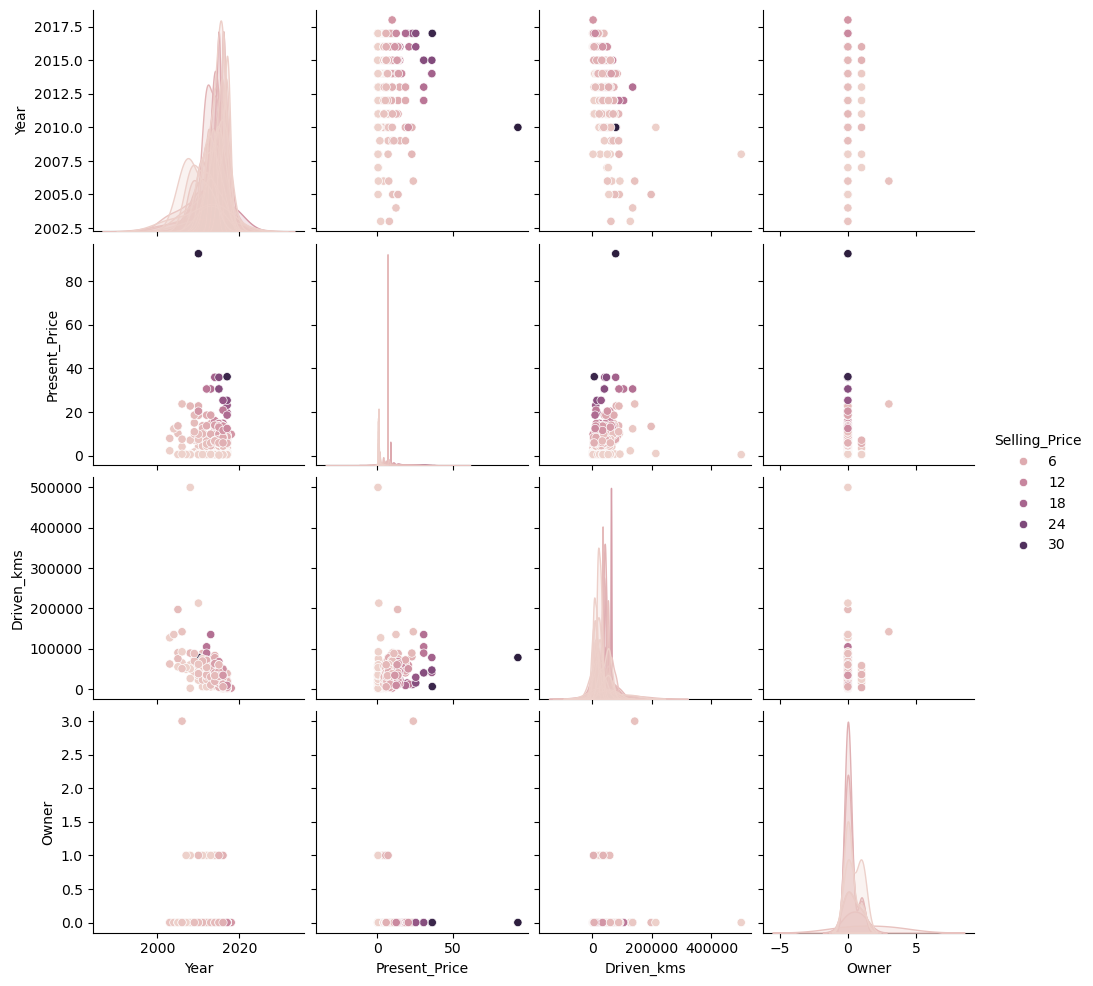

In [17]:
#showing the relationships between all numerical columns in our DataFrame
sns.pairplot(df, hue='Selling_Price')
plt.show()

Data cleaning

In [18]:
#Dealing with duplicated values
df = df.drop_duplicates()

In [19]:
#Checking if the duplicated where removed
duplicated_values=df.duplicated().sum()
print(f"the number of duplicated values in this dataframe is:\n{duplicated_values}")

the number of duplicated values in this dataframe is:
0


In [20]:
#Dealing with the CNG since the only fuel types in morocco are Petrol and Diesel
df['Fuel_Type']=df['Fuel_Type'].apply(lambda x:'Diesel' if x== 'CNG' else x)
df[df['Fuel_Type'] == 'CNG']

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [21]:
#Dealing with illogical driven kilometers values (we focus on old cars that have a driven kilometers less than 10000 taken 
#as a reference of normal usage)
# Calculate minimum km threshold
df["min_km"] = (2025 - df["Year"]) * 1000

# Replace outliers (e.g., 2018 car cannot have <7,000 km)
df["Driven_kms"] = np.where(
    df["Driven_kms"] < df["min_km"],  
    np.maximum(df["min_km"], 10000),  
    df["Driven_kms"]                  
)
df=df.drop('min_km',axis=1)

In [22]:
#Dealing with illogical Present Price values (prices that are below 1.5 million centimes (this value is taken after researching 
#similar cars with the similar conditions))
threshold = 1
df["Present_Price"] = np.where(
    df["Present_Price"] < threshold,
    np.random.randint(1.5, 2.5, size=len(df)),
    df["Present_Price"]
)
df[df['Present_Price']<1]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [23]:
#Dealing with  Selling Price values (prices that are below 1 million centimes (this value is set by the car selling agency 
#as the minimum acceptable selling price during negotiation))
threshold = 1
df["Selling_Price"] = np.where(
    df["Selling_Price"] < threshold,
    np.random.uniform(1, 1.5, size=len(df)),
    df["Selling_Price"]
)
df[df['Selling_Price']<threshold]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [24]:
#Dealing with illogical market price values (prices that are way 200000 dh that is the normal maximum we should have 
#(this value is taken after researching similar cars with the similar conditions))
threshold = 20
df["Present_Price"] = np.where(
    df["Present_Price"] > threshold,
    np.random.randint(15, 20, size=len(df)),
    df["Present_Price"]
)
df[df['Present_Price']>20]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


Préparation des données (Feature Engineering) 

In [25]:
#Categorical data encoding (Fuel_Type,Selling_type,Transmission)
le = LabelEncoder()
df["Fuel_Type"] = le.fit_transform(df["Fuel_Type"])       #here 0=diesel, 1=petrol
df["Selling_type"] = le.fit_transform(df["Selling_type"]) #here 0=dealer, 1=individual 
df["Transmission"] = le.fit_transform(df["Transmission"]) #here 0=automatic, 1=manual
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,0,1,0
1,sx4,2013,4.75,9.54,43000,0,0,1,0
2,ciaz,2017,7.25,9.85,10000,1,0,1,0
3,wagon r,2011,2.85,4.15,14000,1,0,1,0
4,swift,2014,4.60,6.87,42450,0,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0,1,0
297,brio,2015,4.00,5.90,60000,1,0,1,0
298,city,2009,3.35,11.00,87934,1,0,1,0
299,city,2017,11.50,12.50,9000,0,0,1,0


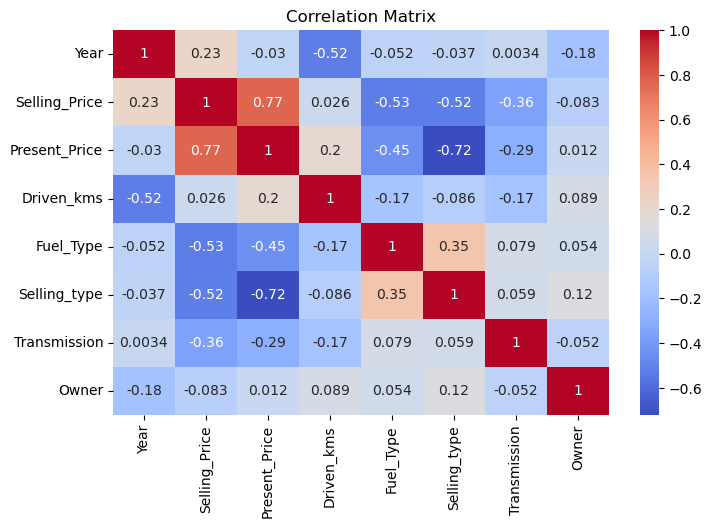

In [26]:
#Feature selection based on their correlation with the target variable (Selling_type)
df_no_names=df.drop('Car_Name',axis=1)
plt.figure(figsize=(8, 5))
sns.heatmap(df_no_names.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [27]:
#Based on the results, the features to keep along with the target variable are Present_price,Year,
#Fuel_Type,Transmission,Selling_type
columns_to_drop=["Owner","Driven_kms"]
df_no_names=df_no_names.drop(columns=columns_to_drop)
df_no_names

,Year,Selling_Price,Present_Price,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,1,0,1
1,2013,4.75,9.54,0,0,1
2,2017,7.25,9.85,1,0,1
3,2011,2.85,4.15,1,0,1
4,2014,4.60,6.87,0,0,1
...,...,...,...,...,...,...
296,2016,9.50,11.60,0,0,1
297,2015,4.00,5.90,1,0,1
298,2009,3.35,11.00,1,0,1
299,2017,11.50,12.50,0,0,1


Modeling and Evaluating

In [44]:
#Separation of features and target variable
x=df_no_names.drop('Selling_Price',axis=1)
y=df_no_names['Selling_Price']
#Splitting training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
# Initialize the model (control complexity with hyperparameters)

rf = RandomForestRegressor(n_estimators=10, max_depth=10)

#fitting the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
  
# Evaluate the model
print("\nModel Evaluation:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Model Evaluation:
MSE: 2.76
RMSE: 1.66
R² Score: 0.89


In [54]:
#Model saving
# 1. Define the exact save path (using raw string for Windows paths)
save_path = r"C:\Users\user\OneDrive\Bureau\stage CodeAlpha\random_forest_model.joblib"

# 2. Save the model directly (directory exists)
dump(rf, save_path)  # rf is the trained RandomForestRegressor

# 3. Verify the save location
print(f"Model successfully saved at:\n{os.path.abspath(save_path)}")

# 4.later loading using 
loaded_model = load(save_path)

Model successfully saved at:
C:\Users\user\OneDrive\Bureau\stage CodeAlpha\random_forest_model.joblib
